# Лабораторная работа 4

Деревья решений

Выполнил: Гершевский Егор Владимирович, гр. 6131-010402D

0.  Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/egorgersevskij/Desktop/University/Магистратура/2/Инструменты анализа данных/tasks/datasets/diabetes.csv")

In [5]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

Этот набор данных изначально получен из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих экземпляров из большей базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индийского происхождения.

Наборы данных состоят из нескольких переменных медицинских предикторов и одной целевой переменной «Результат». Переменные-предикторы включают количество беременностей, которые были у пациентки, их ИМТ, уровень инсулина, возраст и так далее.

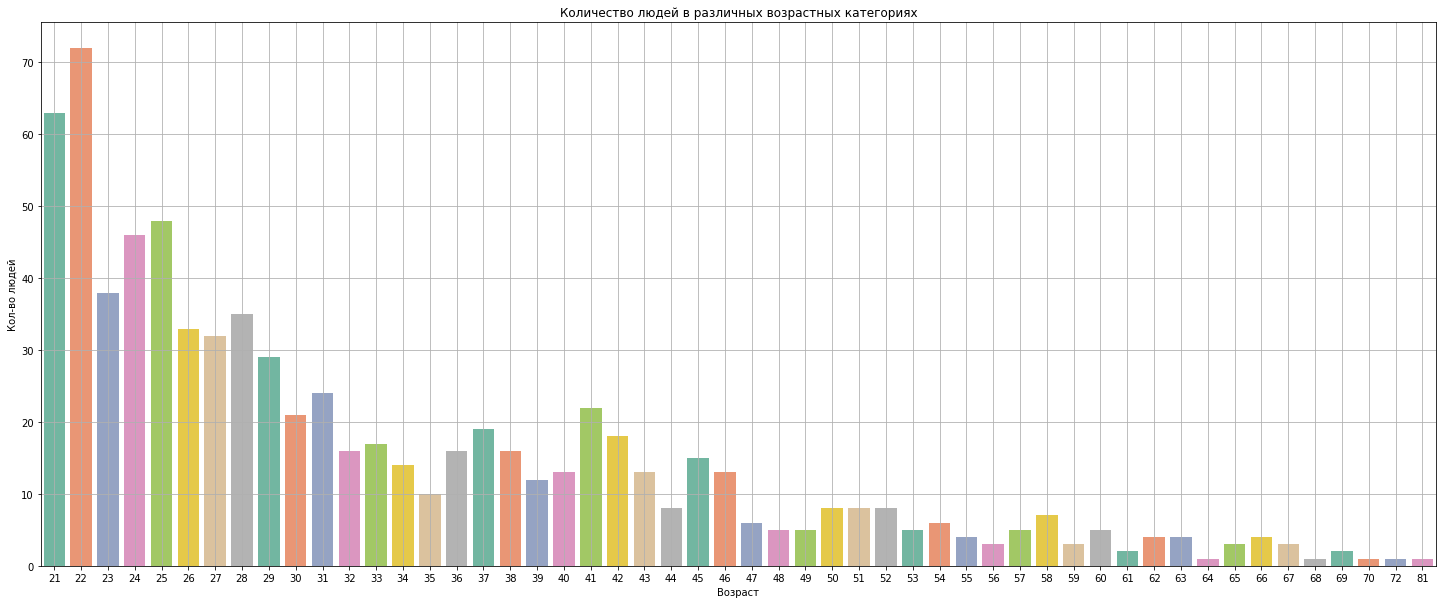

In [10]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(df["Age"], palette="Set2")
ax.set(title="Количество людей в различных возрастных категориях")
plt.ylabel('Кол-во людей')
plt.xlabel('Возраст')
plt.grid()
plt.show()

Из графика видно, что в датасете большинство людей, чей возраст меньше 30 лет.

1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью `pd.factorize` / `pd.get_dummies`

In [15]:
df["Outcome"] = df["Outcome"].replace({1: "Yes", 0: "No"}) #создадим категориальный признак для преобразования

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,No
1,1,85,66,29,0,26.6,0.351,31,Yes
2,8,183,64,0,0,23.3,0.672,32,No
3,1,89,66,23,94,28.1,0.167,21,Yes
4,0,137,40,35,168,43.1,2.288,33,No


In [17]:
codes, uniques = pd.factorize(df["Outcome"])
df["Outcome"] = codes

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0


1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета `KNeighborsClassifier` (без использования конвееров)

In [21]:
X, y = df.drop("Outcome", axis=1), df["Outcome"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=7)

In [23]:
Scaler = MinMaxScaler()
X_scaler = Scaler.fit_transform(X)

In [24]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_scaler, y, test_size=0.25)

In [27]:
KNeighbors = KNeighborsClassifier()
KNeighbors.fit(X_knn_train, y_knn_train)
KNeighborsPredict = KNeighbors.predict(X_test)
print('Accuracy: %2.2f' %accuracy_score(y_test, KNeighborsPredict), '%')
print('Classification report: \n', classification_report(y_test, KNeighborsPredict))

Accuracy: 0.36 %
Classification report: 
               precision    recall  f1-score   support

           0       0.36      0.99      0.53        70
           1       0.50      0.01      0.02       122

    accuracy                           0.36       192
   macro avg       0.43      0.50      0.27       192
weighted avg       0.45      0.36      0.20       192



1.2. То же самое и использованием `sklearn.pipeline.Pipeline`

In [28]:
KNeighborsPipe = Pipeline([('Scaler', MinMaxScaler()), ('kNN', KNeighborsClassifier())])
KNeighborsPipe.fit(X_train, y_train)
KNeighborsPredictPipe = KNeighborsPipe.predict(X_test)
print('Accuracy: %2.2f' %accuracy_score(y_test, KNeighborsPredictPipe), '%')
print('Classification report: \n', classification_report(y_test, KNeighborsPredictPipe))

Accuracy: 0.72 %
Classification report: 
               precision    recall  f1-score   support

           0       0.64      0.54      0.59        70
           1       0.76      0.83      0.79       122

    accuracy                           0.72       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192



1.3. С помощью `GridSearchCV` произвести подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`) и выведите значение гиперпараметра и метрику для наилучшей модели

In [30]:
KNeighborsParams = {'n_neighbors': range(1, 35)}
KNeighborsGCV = GridSearchCV(KNeighborsClassifier(), KNeighborsParams, scoring="roc_auc")
KNeighborsGCV.fit(X_knn_train, y_knn_train)
KNeighborsPredictGCV = KNeighborsGCV.predict(X_test)
print('Accuracy: %2.2f' %accuracy_score(y_test, KNeighborsPredictGCV), '%')
print('Classification report: \n', classification_report(y_test, KNeighborsPredictGCV))

Accuracy: 0.36 %
Classification report: 
               precision    recall  f1-score   support

           0       0.36      1.00      0.53        70
           1       0.00      0.00      0.00       122

    accuracy                           0.36       192
   macro avg       0.18      0.50      0.27       192
weighted avg       0.13      0.36      0.19       192



In [34]:
KNeighborsGCV.best_estimator_ 
#KNeighborsClassifier(n_neighbors=34)

KNeighborsClassifier(n_neighbors=34)

In [39]:
KNeighborsGCV.best_score_
#0.7976062403867281

0.7976062403867281

2.1. Продемонстрировать работу `DecisionTreeClassifier`, посчитать метрики качества на отложенной выборке

In [41]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
classifier_predict = classifier.predict(X_test)
print('Accuracy: %2.2f' %accuracy_score(y_test, classifier_predict), '%')
print('Classification report: \n', classification_report(y_test, classifier_predict))

Accuracy: 0.74 %
Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.59      0.62        70
           1       0.78      0.83      0.80       122

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.73      0.74      0.74       192



2.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать `max_depth`, `max_features` и может быть что-то ещё)

In [43]:
parametrs = {
    "max_depth": np.linspace(1, 32, 32, endpoint=True),
    "min_samples_split": np.linspace(0.01, 0.1, 10, endpoint=True),
    "min_samples_leaf": np.linspace(0.01, 0.1, 10, endpoint=True),
}

classifier_GCV = GridSearchCV(DecisionTreeClassifier(), parametrs)
classifier_GCV.fit(X_train, y_train)
print('Best estimator:', classifier_GCV.best_estimator_)
classifier_GCV_predict = classifier_GCV.predict(X_test)
print('Accuracy: %2.2f' %accuracy_score(y_test, classifier_GCV_predict), '%')
print('Classification report: \n', classification_report(y_test, classifier_GCV_predict))

Best estimator: DecisionTreeClassifier(max_depth=7.0, min_samples_leaf=0.020000000000000004,
                       min_samples_split=0.1)
Accuracy: 0.71 %
Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        70
           1       0.77      0.77      0.77       122

    accuracy                           0.71       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.71      0.71      0.71       192



2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

   feature  importance
1  Glucose    0.499429
5      BMI    0.229376
7      Age    0.122237


<AxesSubplot:xlabel='importance', ylabel='feature'>

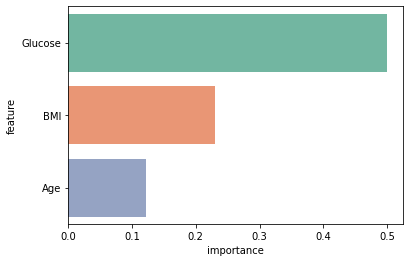

In [67]:
features_importance_df = pd.DataFrame(data={"feature": X_train.columns, 'importance': classifier_GCV.best_estimator_.feature_importances_})
print(features_importance_df.sort_values(by="importance", ascending=False).head(3))
sns.barplot(data=features_importance_df.sort_values(by="importance", ascending=False).head(3), y="feature", x="importance", palette="Set2")

3.1. Продемонстрировать работу случайного леса `RandomForestClassifier`

In [68]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC_predict = RFC.predict(X_test)
print('Accuracy: %2.2f' %accuracy_score(y_test, RFC_predict), '%')
print('Classification report: \n', classification_report(y_test, RFC_predict))

Accuracy: 0.77 %
Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.60      0.65        70
           1       0.79      0.86      0.82       122

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.76      0.77      0.76       192



3.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [75]:
parametrs = {"n_estimators": range(1, 65)}

RFC_GCV = GridSearchCV(RandomForestClassifier(), parametrs)
RFC_GCV.fit(X_train, y_train)
print('Best estimator:', RFC_GCV.best_estimator_)
RFC_GCV_predict = RFC_GCV.predict(X_test)
print('Accuracy: %2.2f' %accuracy_score(y_test, RFC_GCV_predict), '%')
print('Classification report: \n', classification_report(y_test, RFC_GCV_predict))

Best estimator: RandomForestClassifier(n_estimators=31)
Accuracy: 0.76 %
Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.64      0.66        70
           1       0.80      0.83      0.81       122

    accuracy                           0.76       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.76      0.76      0.76       192



   feature  importance
1  Glucose    0.252766
5      BMI    0.179787
7      Age    0.135378


<AxesSubplot:xlabel='importance', ylabel='feature'>

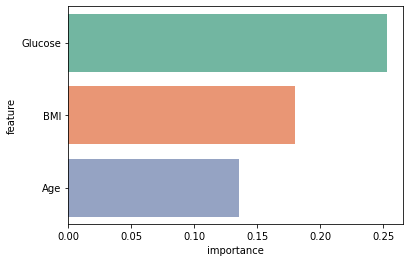

In [76]:
features_importance_df = pd.DataFrame(data={"feature": X_train.columns, 'importance': RFC_GCV.best_estimator_.feature_importances_})
print(features_importance_df.sort_values(by="importance", ascending=False).head(3))
sns.barplot(data=features_importance_df.sort_values(by="importance", ascending=False).head(3), y="feature", x="importance", palette="Set2")

4. Сделать выводы. Какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

Выводы по лабораторной работе:

 - По точности примерно одинаковыми оказались Random Forest Classifier (Accuracy = 77%) и DecisionTree (Accuracy = '74%'), совсем неудачно отработал KNeighborsClassifier (Accuracy = 36%)
 - Для каждой модели важны различные признаки
 - GridSearchCV (и Pipeline) положительно влияет на точность модели